In [36]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import datetime
import scipy.stats as stats

1. Import claims_data.csv and cust_data.csv which is provided to you and
combine the two datasets appropriately to create a 360-degree view of
the data. Use the same for the subsequent questions.


In [38]:
claims_data = pd.read_csv("G:/Data Science Recorded Lectures/case studies/5. Pandas Case Study 3 - Insurance Claims Case Study/5. Pandas Case Study 3 - Insurance Claims Case Study/claims.csv")
claims_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [40]:
cust_data = pd.read_csv("G:/Data Science Recorded Lectures/case studies/5. Pandas Case Study 3 - Insurance Claims Case Study/5. Pandas Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")
cust_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [41]:
df = pd.merge(left =  cust_data,
              right = claims_data,
              left_on = "CUST_ID",
              right_on = "customer_id",
              how = "inner",
              indicator = True
             )
data = df
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,_merge
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,both
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,both
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,both
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,both
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,both
5,47830476,Female,01-May-86,MA,413-187-7945,Silver,91609100,47830476,Natural causes,04/12/2017,Auto,Unknown,Material only,$1440,1.0,No,both
6,19269962,Male,13-May-77,NV,956-871-8691,Gold,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,both
7,19269962,Male,13-May-77,NV,956-871-8691,Gold,39219616,19269962,Other causes,09/26/2018,Auto,No,Material only,$2240,2.0,No,both
8,21831191,Male,17-May-77,NH,419-712-8513,Gold,24050443,21831191,Other driver error,10/04/2017,Auto,No,Injury only,$38306.5,3.0,Yes,both
9,21831191,Male,17-May-77,NH,419-712-8513,Gold,91475471,21831191,Driver error,02/09/2018,Auto,Unknown,Material and injury,$36810,1.0,No,both


In [42]:
data=df.drop(columns = '_merge')
data.dropna(inplace = True)

2. Perform a data audit for the datatypes and find out if there are any
mismatch within the current datatypes of the columns and their
business significance.


In [43]:
#Data Audit
d=data.dtypes[data.dtypes!='object'].index.values
data[d]=data[d].astype('float64')


In [47]:
mean=DataFrame({'mean':data[d].mean()})
std_dev=DataFrame({'std_dev':data[d].std()})
missing= DataFrame({'missing':data[d].isnull().sum()})
minimum=DataFrame({'min':data[d].min()})
maximum=DataFrame({'max':data[d].max()})
DA=pd.concat([mean,std_dev,missing,minimum,maximum],axis=1,sort = False)



In [48]:
c=data.dtypes[data.dtypes=='object'].index.values
Mean=DataFrame({'mean':np.repeat('Not Applicable',len(c))},index=c)
Std_Dev=DataFrame({'std_dev':np.repeat('Not Applicable',len(c))},index=c)
Missing=DataFrame({'missing':data[c].isnull().sum()})
Minimum=DataFrame({'min':np.repeat('Not Applicable',len(c))},index=c)
Maximum=DataFrame({'max':np.repeat('Not Applicable',len(c))},index=c)
Da=pd.concat([Mean,Std_Dev,Missing,Minimum,Maximum],axis =1,sort = False)


In [49]:
Dq = pd.concat([DA,Da])

In [51]:
Dq.to_csv('DataAudit.csv')

In [52]:
dq = pd.read_csv("DataAudit.csv")
dq.rename(columns = {'Unnamed: 0':''})

,,mean,std_dev,missing,min,max
0,CUST_ID,50607688.35509396,28550999.39940614,0,263204.0,99961993.0
1,claim_id,48640566.59643917,29237332.129223503,0,26832.0,99775483.0
2,customer_id,50607688.35509396,28550999.39940614,0,263204.0,99961993.0
3,total_policy_claims,1.589515331355094,1.146949834683082,0,1.0,8.0
4,gender,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
5,DateOfBirth,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
6,State,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
7,Contact,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
8,Segment,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
9,incident_cause,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable


3. Convert the column claim_amount to numeric. Use the appropriate
modules/attributes to remove the $ sign.


In [53]:
data['claim_amount'] = data['claim_amount'].astype(str)
data['claim_amount'] = data['claim_amount'].str.replace('$','')
data['claim_amount'] = pd.to_numeric(data['claim_amount'])
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No
5,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,91609100.0,47830476.0,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No
6,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,22890252.0,19269962.0,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No
7,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,39219616.0,19269962.0,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No
8,21831191.0,Male,17-May-77,NH,419-712-8513,Gold,24050443.0,21831191.0,Other driver error,10/04/2017,Auto,No,Injury only,38306.5,3.0,Yes
9,21831191.0,Male,17-May-77,NH,419-712-8513,Gold,91475471.0,21831191.0,Driver error,02/09/2018,Auto,Unknown,Material and injury,36810.0,1.0,No


4. Of all the injury claims, some of them have gone unreported with the
police. Create an alert flag (1,0) for all such claims.


In [10]:
data['Flag'] = np.where(data.police_report == 'Unknown',0,1)
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,1
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,1
5,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,91609100.0,47830476.0,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No,0
6,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,22890252.0,19269962.0,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,1
7,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,39219616.0,19269962.0,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No,1
8,21831191.0,Male,17-May-77,NH,419-712-8513,Gold,24050443.0,21831191.0,Other driver error,10/04/2017,Auto,No,Injury only,38306.5,3.0,Yes,1
9,21831191.0,Male,17-May-77,NH,419-712-8513,Gold,91475471.0,21831191.0,Driver error,02/09/2018,Auto,Unknown,Material and injury,36810.0,1.0,No,0


5. One customer can claim for insurance more than once and in each claim,
multiple categories of claims can be involved. However, customer ID
should remain unique.
Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column.


In [54]:
data.drop_duplicates(subset = 'CUST_ID',keep = 'last')

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No
5,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,91609100.0,47830476.0,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No
7,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,39219616.0,19269962.0,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No
9,21831191.0,Male,17-May-77,NH,419-712-8513,Gold,91475471.0,21831191.0,Driver error,02/09/2018,Auto,Unknown,Material and injury,36810.0,1.0,No
10,18401412.0,Male,02-Mar-99,AR,752-398-2914,Gold,12878692.0,18401412.0,Driver error,01/13/2018,Auto,No,Material only,1730.0,4.0,No
11,73486606.0,Male,25-Oct-99,AK,256-968-9172,Silver,27026412.0,73486606.0,Natural causes,04/10/2018,Auto,No,Material only,1160.0,3.0,No
12,32813689.0,Male,12-Oct-93,ID,142-324-7481,Silver,43908336.0,32813689.0,Crime,02/15/2018,Auto,Unknown,Material only,2620.0,1.0,No
13,33507197.0,Female,09-Sep-66,RI,165-519-4583,Gold,63246959.0,33507197.0,Crime,07/22/2017,Auto,No,Material only,2748.5,2.0,Yes


6. Check for missing values and impute the missing values with an
appropriate value. (mean for continuous and mode for categorical)


In [55]:
#Categorical values
data['total_policy_claims'].replace(np.NaN,data['total_policy_claims'].mode())

#Continous values
data['claim_amount'].replace(np.NaN,data['claim_amount'].mean())

data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No
5,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,91609100.0,47830476.0,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No
6,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,22890252.0,19269962.0,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No
7,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,39219616.0,19269962.0,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No
8,21831191.0,Male,17-May-77,NH,419-712-8513,Gold,24050443.0,21831191.0,Other driver error,10/04/2017,Auto,No,Injury only,38306.5,3.0,Yes
9,21831191.0,Male,17-May-77,NH,419-712-8513,Gold,91475471.0,21831191.0,Driver error,02/09/2018,Auto,Unknown,Material and injury,36810.0,1.0,No


7. Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60


In [58]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(data['DateOfBirth']).year          #extract year from DateOfBirth
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
data['age'] = (np.where(dob_year > curr_year,v,y))


In [59]:
#Categorising
data.loc[(data.age < 18),'AgeGroup'] = 'Children'
data.loc[(data.age >=18) & (data.age <30),'AgeGroup'] = 'Youth'
data.loc[(data.age >=30) & (data.age <60),'AgeGroup'] = 'Adult'
data.loc[(data.age >=60),'AgeGroup'] = 'Senior'

data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age,AgeGroup
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,41,Adult
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,50,Adult
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,36,Adult
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,36,Adult
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,34,Adult
5,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,91609100.0,47830476.0,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No,34,Adult
6,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,22890252.0,19269962.0,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,43,Adult
7,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,39219616.0,19269962.0,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No,43,Adult
8,21831191.0,Male,17-May-77,NH,419-712-8513,Gold,24050443.0,21831191.0,Other driver error,10/04/2017,Auto,No,Injury only,38306.5,3.0,Yes,43,Adult
9,21831191.0,Male,17-May-77,NH,419-712-8513,Gold,91475471.0,21831191.0,Driver error,02/09/2018,Auto,Unknown,Material and injury,36810.0,1.0,No,43,Adult


8. What is the average amount claimed by the customers from various
segments?


In [60]:
data.groupby('Segment').mean()[['claim_amount']]

,claim_amount
Segment,
Gold,12723.927954
Platinum,12397.859420
Silver,12217.995298


9. What is the total claim amount based on incident cause for all the claims
that have been done at least 20 days prior to 1st of October, 2018.


In [63]:
#from datetime import date,timedelta  
#days_before = (date.today()-timedelta(days=20)).isoformat()
#days_before

10. How many adults from TX, DE and AK claimed insurance for driver
related issues and causes?


In [67]:
count = data.loc[((data.State == 'TX') | (data.State == 'DE') | (data.State == 'AK')) &
                 (data.incident_cause == 'Driver error') &
                 (data.AgeGroup == 'Adult'),['AgeGroup']].count()
count

AgeGroup    15
dtype: int64

11. Draw a pie chart between the aggregated value of claim amount based
on gender and segment. Represent the claim amount as a percentage on
the pie chart.

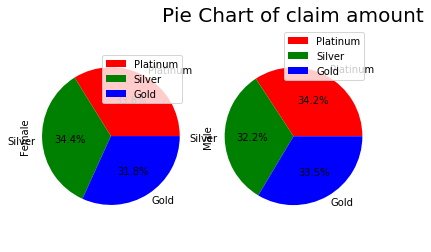

In [68]:
import matplotlib.pyplot as plt
claim = pd.pivot_table(data, index =['Segment'],columns ='gender',values ='claim_amount')
claim.plot(kind='pie', 
            labels=['Platinum','Silver','Gold'],
            colors=['r', 'g', 'b'],
            autopct='%.1f%%', # to get percentage and round off appropriately
            fontsize=10,
            subplots='true')
plt.title('Pie Chart of claim amount',fontsize=20)

plt.axis('equal')
plt.show()


12. Among males and females, which gender had claimed the most for any
type of driver related issues? E.g. This metric can be compared using a
bar chart


In [69]:
issue = data.loc[data['incident_cause'].isin(['Driver error','Other driver error'])]
group_gender = issue.groupby(['gender'])['claim_amount'].sum()
group_gender.nlargest(1)

gender
Male    3762289.0
Name: claim_amount, dtype: float64

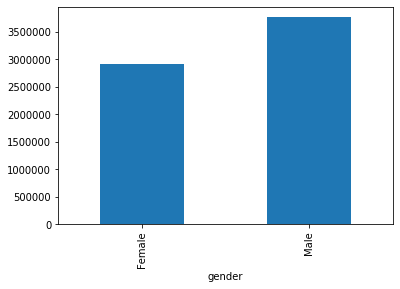

In [70]:
# Comparing using a bar chart
group_gender.plot(kind = 'bar')

As we can see from the above figure and the value we got, it is been clear that male has claimed the most for any type of driver related issues

13. Which age group had the maximum fraudulent policy claims? Visualize
it on a bar chart.


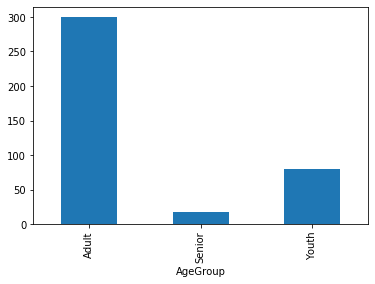

In [71]:
issue1 = data.loc[data['fraudulent'] == 'Yes']
group_age = issue1.groupby(['AgeGroup'])['total_policy_claims'].sum()
group_age.plot(kind = 'bar')

14. Visualize the monthly trend of the total amount that has been claimed
by the customers. Ensure that on the “month” axis, the month is in a
chronological order not alphabetical order.


In [72]:
data['claim_date']=pd.to_datetime(data['claim_date'])

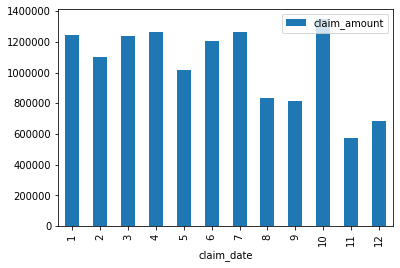

In [73]:
# display(customers.info())
temp = data.groupby(data.claim_date.dt.month)
result = temp[['claim_amount']].sum()
# display(result)
result.plot(kind="bar")

Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

16. Is there any similarity in the amount claimed by males and females? 

In [74]:
claim_male = data['claim_amount'].loc[data['gender']=="Male"]

claim_female = data['claim_amount'].loc[data['gender']=="Female"]

In [75]:
print("The average amount claimed by males is {}".format(claim_male.mean()))

print("The average amount claimed by females is {}".format(claim_female.mean()))

The average amount claimed by males is 12855.763565891473
The average amount claimed by females is 12033.19393939394


# Two Sample t-Test(Independent)


In [78]:
import scipy.stats as stats

equal_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=True)    # equal variance
equal_var.statistic

0.9494491636619324

In [79]:
unequal_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=False)    # UnEqual variance
unequal_var.statistic

0.9501848470702697

In [80]:
# We'll cosider equal variance since the t score is not having a huge difference
unequal_var.statistic - equal_var.statistic

0.0007356834083372954

In [81]:
t = equal_var.statistic

p = equal_var.pvalue

print(" For the above test, the t-score is {} and the p-value is {}".format(t,p))

if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

 For the above test, the t-score is 0.9494491636619324 and the p-value is 0.34261956549002026
We fail to reject null hypothesis


Since the significance value of the test is greater than 0.05, we can safely conclude that there is a similarity between amount claimed by males and females

17. Is there any relationship between age category and segment?

#### Chi-Square Test

H0 : Observed == Expected
    (No relation between category and segment)
    
Ha : Observed != Expected
    (There is a realtionship between category and segment)

In [82]:
agecat_seg_xtab = pd.crosstab(data.AgeGroup, data.Segment, margins = True)
agecat_seg_xtab

Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,268,247,237,752
Senior,5,12,8,25
Youth,74,86,74,234
All,347,345,319,1011


In [83]:
x2test_17 = stats.chi2_contingency(observed= agecat_seg_xtab)

x2test_17

(4.616557555494832,
 0.8663721177518873,
 9,
 array([[ 258.10484669,  256.61721068,  237.27794263,  752.        ],
        [   8.58061325,    8.53115727,    7.88822948,   25.        ],
        [  80.31454006,   79.85163205,   73.83382789,  234.        ],
        [ 347.        ,  345.        ,  319.        , 1011.        ]]))

In [84]:
print("The chi square stat is {} and the p value is {}".format(x2test_17[0],x2test_17[1]))

The chi square stat is 4.616557555494832 and the p value is 0.8663721177518873


Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment

18. The current year has shown a significant rise in claim amounts as
compared to 2016-17 fiscal average which was $10,000.

In [85]:
data2017=data.claim_amount[data.claim_date.dt.year==2017]
data2018=data.claim_amount[data.claim_date.dt.year==2018]
stats.f_oneway(data2017,data2018)

F_onewayResult(statistic=0.23711171361384947, pvalue=0.6264057741916416)

:-Hence, we reject H1(alternative) because p_value is greater than 0.05. which means there is no significant rise in claim amount in current year.

19. Is there any difference between age groups and insurance claims

## F-Test/Anova

In [86]:
age_group_1 = data['total_policy_claims'].loc[data['AgeGroup']=="Youth"]
age_group_2 = data['total_policy_claims'].loc[data['AgeGroup']=="Adult"]
# Perfrom the Anova
anova = stats.f_oneway(age_group_1,age_group_2)
# Statistic :  F Value
f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

The f-value is 1.179275991883912 and the p value is 0.27776939626692726
We fail to reject null hypothesis


Since the significance value of the test is greater than 0.05, we fail reject the null hypothesis. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims

20. Is there any relationship between total number of policy claims and the
claimed amount?

# Correlation

In [87]:
data.total_policy_claims.corr(other=data.claim_amount)

-0.01808658678959939

Hence total number of policy claims is inversely proportional to the claimed amount

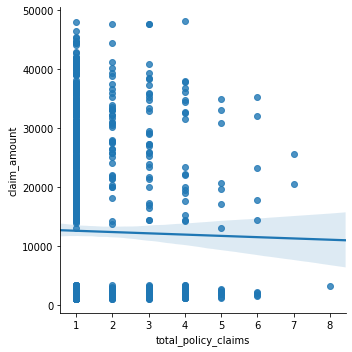

In [88]:
sns.lmplot(x = "total_policy_claims", y = "claim_amount",data = data)